In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
data = pd.read_csv("cleaninput.csv", low_memory = False);
cols = list(data);
print(cols);

['P. Name', 'P. Zone Class', 'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Habitable Class', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)', 'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)', 'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity', 'P. Mean Distance (AU)', 'P. Omega (deg)', 'S. Constellation', 'S. Type', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)', 'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet', 'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI', 'P. ESI', 'S. HabCat', 'P. Habitable', 'P. Hab Moon', 'P. Confirmed', 'P. Disc. Method']


In [4]:
data = data.drop('P. Name', 1);

In [5]:
data = data.drop('P. Disc. Method',1);
data = data.drop('P. Confirmed', 1);
data = data.drop('P. Hab Moon', 1);
data = data.drop('P. Habitable', 1);
data = data.drop('S. HabCat', 1);
data = data.drop('S. Type', 1);
data = data.drop('S. Constellation', 1);
data.to_csv('knn.csv');

In [6]:
cols = list(data);
print(cols);

['P. Zone Class', 'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Habitable Class', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)', 'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)', 'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity', 'P. Mean Distance (AU)', 'P. Omega (deg)', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)', 'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet', 'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI', 'P. ESI']


In [7]:
print(data['P. Zone Class'].value_counts())

Hot     3220
Cold     341
Warm     229
Name: P. Zone Class, dtype: int64


In [8]:
zoneclass = {'Hot':1, 'Cold':2, 'Warm':3};
data['P. Zone Class'] = [zoneclass[item] for item in data['P. Zone Class']];
print(data['P. Zone Class'].value_counts())

1    3220
2     341
3     229
Name: P. Zone Class, dtype: int64


In [9]:
print(data['P. Mass Class'].value_counts())

Jovian         1205
Superterran     990
Neptunian       808
Terran          710
Subterran        72
Mercurian         5
Name: P. Mass Class, dtype: int64


In [10]:
massclass = {'Jovian':1, 'Superterran':2, 'Neptunian':3, 'Terran':4, 'Subterran':5, 'Mercurian':6};
data['P. Mass Class'] = [massclass[item] for item in data['P. Mass Class']];
print(data['P. Mass Class'].value_counts())

1    1205
2     990
3     808
4     710
5      72
6       5
Name: P. Mass Class, dtype: int64


In [11]:
print(data['P. Composition Class'].value_counts())

gas            2041
rocky-iron     1663
rocky-water      45
water-gas        24
iron             17
Name: P. Composition Class, dtype: int64


In [12]:
compclass = {'gas':1, 'rocky-iron':2, 'rocky-water':3, 'water-gas':4, 'iron':5};
data['P. Composition Class'] = [compclass[item] for item in data['P. Composition Class']];
print(data['P. Composition Class'].value_counts())

1    2041
2    1663
3      45
4      24
5      17
Name: P. Composition Class, dtype: int64


In [13]:
print(data['P. Atmosphere Class'].value_counts())

metals-rich      2372
hydrogen-rich    1041
no-atmosphere     377
Name: P. Atmosphere Class, dtype: int64


In [14]:
atclass = {'metals-rich':1, 'hydrogen-rich':2, 'no-atmosphere':3};
data['P. Atmosphere Class'] = [atclass[item] for item in data['P. Atmosphere Class']];
print(data['P. Atmosphere Class'].value_counts())

1    2372
2    1041
3     377
Name: P. Atmosphere Class, dtype: int64


In [15]:
print(data['P. Habitable Class'].value_counts())

non-habitable        3735
mesoplanet             31
psychroplanet          18
hypopsychroplanet       3
thermoplanet            3
Name: P. Habitable Class, dtype: int64


In [16]:
habclass = {'non-habitable':0, 'mesoplanet':1, 'psychroplanet':1, 'hypopsychroplanet':1, 'thermoplanet':1};
data['P. Habitable Class'] = [habclass[item] for item in data['P. Habitable Class']];
print(data['P. Habitable Class'].value_counts())

0    3735
1      55
Name: P. Habitable Class, dtype: int64


In [17]:
data.to_csv('knn.csv');

In [18]:
print(cols)

['P. Zone Class', 'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Habitable Class', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)', 'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)', 'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity', 'P. Mean Distance (AU)', 'P. Omega (deg)', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)', 'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet', 'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI', 'P. ESI']


In [19]:
cols.remove('P. Habitable Class');

In [20]:
print(cols);

['P. Zone Class', 'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)', 'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)', 'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity', 'P. Mean Distance (AU)', 'P. Omega (deg)', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)', 'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet', 'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI', 'P. ESI']


In [21]:
def euclid(rows, remval):
    value = 0;
    loopcounter = 0;
    fintuple = [];
    allrows = data.itertuples(index = False);
    allrows = list(allrows);
    for k in allrows:
        loopcounter = loopcounter + 1;
        value = 0;
        l = list(k);
       
        if(loopcounter == remval):
            loopcounter = loopcounter + 1;
            
        else:
            for j in range(len(rows)):
                value+=(rows[j]-l[j])**2;
            fintuple.append(math.sqrt(value));
        
            loopcounter = loopcounter + 1;
            #print(loopcounter);
    return fintuple 

In [22]:
def mode(a, b, c):
    if(a==b and b==c):
        return a
    if(a==b):
        return a
    if(b==c):
        return b
    if(c ==a):
        return c

In [23]:
outputval = []
eucdist = [];
tn = 0.00001
tp = 0.00001
fn = 0.00001
fp = 0.00001
i = 0;
for row in data.itertuples(index=False):
 
    dist = euclid(list(row), i);
    m1 = dist.index(min(dist));
    dist[m1] = math.inf;
    m2 = dist.index(min(dist));
    dist[m2] = math.inf;
    m3 = dist.index(min(dist));
    dist[m3] = math.inf;
  
    out = mode(data['P. Habitable Class'][m1], data['P. Habitable Class'][m2], data['P. Habitable Class'][m3])
    outputval.append(out);
    eucdist.append(out == row[4]);
    if(int(out) == 1 and int(row[5]) == 1):
            
        tp = tp + 1
    if(int(out) == 1 and int(row[5]) == 0):
            
        fp = fp + 1
    if(int(out) == 0 and int(row[5]) == 0):
            
        tn = tn + 1
    if(int(out) == 0 and int(row[5]) == 1):
            
        fn = fn + 1
    #print(str(len(dist))+" "+str(len(data)));
    
    i = i + 1;
print(eucdist)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [24]:
precision = tp/(tp + fp)
recall = tp/(tp+fn)
fscore = 2*(precision*recall)/(precision + recall)
print(precision)
print(recall)
print(fscore)
print(precision + recall)

0.40000039999840004
0.008810615963822382
0.017241462544575425
0.4088110159622224


In [25]:
count = 0;
for i in range(len(eucdist)):
    if(eucdist[i] == True):
        count = count + 1;
accuracy = count /len(eucdist);
print(accuracy);

0.9878627968337731


In [26]:
import random

In [27]:
testrows = []
while(len(testrows)!=100):
    a = random.randint(1,len(data)+1)
    if(a not in testrows):
        testrows.append(a)
print(testrows)

[290, 1072, 398, 2489, 3555, 1198, 1085, 1079, 2189, 2665, 1595, 1825, 1883, 1002, 2894, 23, 3097, 2655, 2934, 3347, 1914, 2838, 2449, 1314, 203, 761, 1262, 3124, 1443, 1899, 243, 841, 482, 1457, 552, 212, 76, 1529, 3269, 2671, 1302, 358, 702, 657, 3395, 711, 2949, 1437, 2592, 3729, 845, 1068, 432, 2433, 746, 2703, 1671, 835, 3394, 933, 1675, 3634, 2960, 2810, 3731, 3737, 3029, 1760, 1507, 3301, 3658, 2430, 687, 2912, 1957, 2217, 2178, 2627, 3471, 1441, 1704, 2973, 2739, 465, 1503, 2763, 1074, 1235, 1632, 3776, 1242, 2725, 1674, 2965, 1481, 1114, 3525, 3313, 1319, 1569]


In [28]:
testr = []
for i in testrows:
    testr.append(list(data.loc[i]))
print(testr)

[[2.0, 1.0, 1.0, 2.0, 0.0, 445.12, 10.82, 0.35, 3.8, 6.41, 0.05202869, 0.06326609, 0.07771476, 121.7, 127.5, 134.5, 156.4, -19.36, 20.67, 1798.0, 2.75, 0.1, 2.74, 155.0, 0.86, 0.84, 5246.0, 0.476051, 0.0, 7.8, 10.5, 90.0, 21.6358, 30.4886, -23.7, 0.163, 2.0, 0.0, 0.534, 1.279, 4.96, 6.92, 9.23, 0.07, 0.17], [1.0, 2.0, 2.0, 1.0, 0.0, 7.13, 1.82, 1.18, 2.15, 1.98, 44.7308, 44.7308, 44.7308, 658.9, 658.9, 658.9, 8.4, -22.63, 3.46, 6.1, 0.0579, 0.0, 0.06, 0.0, 0.7, 0.63, 4530.0, 0.149956, -0.06071394910461843, 4.205140795802378, 14.4, 608.4120264650286, 3.8324, 14.5022, -30.9, 5.801, 1.0, 0.0, 0.309, 0.763, -2.11, -0.14, -0.24, 0.32, 0.29], [1.0, 1.0, 1.0, 2.0, 0.0, 508.7, 11.0, 0.38, 4.2, 6.8, 38.88794, 49.98008, 65.33059, 636.2, 675.3, 724.3, 194.3, -26.68, 21.03, 311.6, 1.2, 0.13, 1.19, 64.0, 2.54, 12.02, 4844.0, 71.36994399999998, 0.0, 4.205140795802378, 5.9, 115.2, 0.5528, 54.895, -31.0, 5.385, 1.0, 0.0, 6.665, 16.217, -2.14, 7.11, 3.32, 0.11, 0.13], [1.0, 2.0, 2.0, 1.0, 0.0, 4.2, 1.5

In [29]:
outp = []
eucdist = []
i = 0
for row in testr:
 
    dist = euclid(row, i);
    m1 = dist.index(min(dist));
    dist[m1] = math.inf;
    m2 = dist.index(min(dist));
    dist[m2] = math.inf;
    m3 = dist.index(min(dist));
    dist[m3] = math.inf;
  
    out = mode(data['P. Habitable Class'][m1], data['P. Habitable Class'][m2], data['P. Habitable Class'][m3])
    outputval.append(out);
    eucdist.append(out == row[4]);
    #print(str(len(dist))+" "+str(len(data)));
    
    i = i + 1;
print(eucdist)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [30]:
accuracy_tuple = []
precision_tuple = []
recall_tuple = []
fscore_tuple = []
for iter in range(25):
    tn = 0.00001
    tp = 0.00001
    fn = 0.00001
    fp = 0.00001
    testrows = []
    while(len(testrows)!=100):
        a = random.randint(0,len(data)-1)
        if(a not in testrows):
            testrows.append(a)
    testr = []
    for i in testrows:
        testr.append(list(data.loc[i]))
    outp = []
    eucdist = []
    i = 0
    for row in testr:
 
        dist = euclid(row, i);
        m1 = dist.index(min(dist));
        dist[m1] = math.inf;
        m2 = dist.index(min(dist));
        dist[m2] = math.inf;
        m3 = dist.index(min(dist));
        dist[m3] = math.inf;
  
        out = mode(data['P. Habitable Class'][m1], data['P. Habitable Class'][m2], data['P. Habitable Class'][m3])
        outputval.append(out);
        if(int(out) == 1 and int(row[5]) == 1):
            
            tp = tp + 1
        if(int(out) == 1 and int(row[5]) == 0):
            
            fp = fp + 1
        if(int(out) == 0 and int(row[5]) == 0):
            
            tn = tn + 1
        if(int(out) == 0 and int(row[5]) == 1):
            
            fn = fn + 1
        eucdist.append(out == row[4]);
        #print(str(len(dist))+" "+str(len(data)));
    
        i = i + 1;
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    fscore = 2*(precision*recall)/(recall + precision)
    precision_tuple.append(precision)
    recall_tuple.append(recall)
    fscore_tuple.append(fscore)
    count = 0;
    for k in eucdist:
        if(k == True):
            count = count + 1
    accuracy_tuple.append(count/len(eucdist))
        

In [31]:
print(accuracy_tuple)
print(recall_tuple)
print(fscore_tuple)
print(precision_tuple)

[0.99, 0.99, 1.0, 0.99, 1.0, 0.96, 1.0, 0.98, 1.0, 0.98, 0.96, 0.99, 0.97, 0.99, 1.0, 1.0, 0.97, 0.98, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.97]
[9.999980000040002e-07, 1.999992000032e-06, 2.4999875000625e-06, 9.999980000040002e-07, 1.6666611111296298e-06, 1.2499968750078127e-06, 0.12500093749765628, 1.1111086419807957e-06, 1.999992000032e-06, 1.4285673469504376e-06, 2.4999875000625e-06, 0.16666777777407413, 1.4285673469504376e-06, 4.999950000499995e-06, 2.4999875000625e-06, 2.4999875000625e-06, 2.4999875000625e-06, 2.4999875000625e-06, 1.2499968750078127e-06, 1.999992000032e-06, 1.4285673469504376e-06, 3.3333111112592582e-06, 2.4999875000625e-06, 1.999992000032e-06, 2.4999875000625e-06]
[1.9999920000320006e-06, 3.9999680002559986e-06, 4.999950000499996e-06, 1.9999920000320006e-06, 3.333311111259259e-06, 2.4999875000625e-06, 0.22222345678463654, 2.222212345722908e-06, 3.9999680002559986e-06, 2.857126530705539e-06, 4.999950000499996e-06, 0.25000124999375006, 2.857126530705539e-06, 9.9998000

In [34]:
accuracy = np.mean(accuracy_tuple)*100
print(accuracy)

ps = np.mean(precision_tuple)*100
print(ps)

rc = np.mean(recall_tuple)*100
print(rc)

f1 = np.mean(fscore_tuple)*100
print(f1)


98.8
50.0
1.1668664474495472
1.8892805694047732


In [35]:
import matplotlib.pyplot as plt

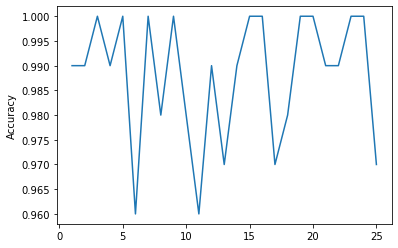

In [36]:
x_axis = range(1,26)
plt.plot(x_axis, accuracy_tuple)
plt.ylabel("Accuracy")
plt.show()

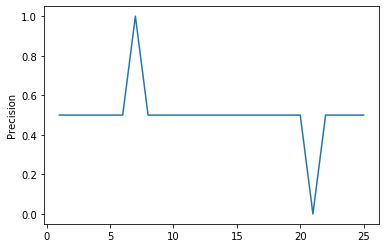

In [37]:
plt.plot(x_axis, precision_tuple)
plt.ylabel("Precision")
plt.show()

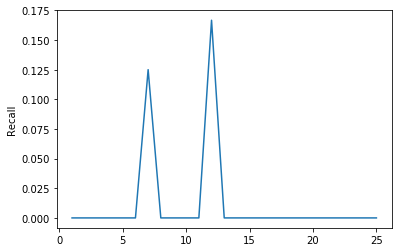

In [38]:
plt.plot(x_axis, recall_tuple)
plt.ylabel("Recall")
plt.show()

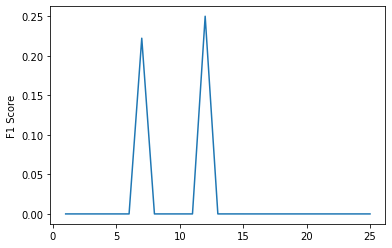

In [39]:
plt.plot(x_axis, fscore_tuple)
plt.ylabel("F1 Score")
plt.show()